# Snapchat Political Ads

This was a project that I did to investigate data from snapchat political ads. I broke the entire project down into two parts: Analysis (Part 1) and Modeling (Part 2). 
## Summary of Findings (Analysis - Part 1)

### Introduction
Snapchat has become a vital source of entertainment and information for many of the younger generation. With a popularity that is steadily increasing, political groups have begun investing ads in the app in order to spread their message and increase support for their campaign. For the last couple of years, Snapchat has compiled data on  political ads that have appeared on the app in order to give users a sense of transparency. The data set as a whole includes columns with information on things like how much the ad cost, how long the ad run, what genders were targeted, what regions were targeted, and much more. In this project, I will be investigating the following question: what are the characteristics of an ad that determines the number of views it gets? Is it the budget of the ad? Or could it be its duration on the app? This is the main inquiry I will be investigating but there are other questions I am curious about such as how successful were the organizations that had the most expensive ads? Which candidates/ballots appeared the most frequently and how successful were they?

### Cleaning and EDA
#### Cleaning Data
To start off, I read in the csv files for the 2018 and 2019 data before I concatenated the two into a single data frame. I then proceeded to convert the StartDate and EndDate columns into datetime objects. After that, I decided to calculate a "Time Elapsed" column since I wanted to know if the time an ad spends on Snapchat affects its impressions count. However, I noticed that some of the start dates were after the end dates, so I created a helper function to account for that before I made the column. Next, I noticed that some of the columns had values that were missing by design (either NaN values meant "None" or "All" rather than a specified value), so I impute some of those columns (the ones that needed it) by replacing NaN with "ALL" and left the others alone (since NaN pretty much means "None" in this context). Lastly, I decided to conduct most of my analysis with spending and time elapsed in quartiles and using only the ads that were paid in USD. I did this to simplify things and because I felt like changing these quantitative columns into categorical columns was most appriopriate so that I could group rows into "spending relative to the average ad" and "time spent on Snapchat relative to the average ad." 

#### Univariate Analysis
Following my data cleaning, I found the summary statistics for columns Spend, Impressions, and Time Elapsed as well as plotting box plots for Spend and Impressions in order to get an idea of the data in each column. I then found the most common candidates and organizations, the most expensive ads, and plotted a bar plot to visualize the distributions of the most common candidates and organizations. I did all of these to see if I can find anything interesting and visualize the data so that I could possibly answer some of my other questions down the line.

Some things that I found interesting included the fact that there were quite a few outliers in both Spend (75th percentile of 720.5 USD but a max of 451244 USD) and Time Elapsed (75th percentile of 28 days but a max of 272 days), and while I'm not sure how that would play out in my analysis, it is definitely something I should keep in mind. Moreover, I was unaware that Elizabeth Warren spent so much of her resources on Snapchat ads (probably because I don't spend much time on the app) as she was among both the most common candidates/ballots and the most common organizations. Although this fact may not help my investigation that much, I found it quite interesting.

#### Bivariate Analysis
First, I found the conditional distribution of impressions given a certain quartile of spending as well as the average impression count for each quartile of spending. I did the same for time elapsed and also plotted scatter plots of Spend vs Impressions and Time Elapsed vs Impressions. These were all done in order to possibly identify some sort of correlation between the columns, and I did indeed notice that higher spending/time elapsed quartiles had higher proportions of impressions and higher mean impressions count.

That being said, the scatter plots demonstrated the effects of the outliers within Time Elapsed and Spend. While Spend did seem to pose a slight correlation with Impressions, the clarity of said correlation was muddled by a few outliers. Time Elapsed, on the other hand, did not seem to be much of a threat in terms of demonstrating a competitive correlation in the scatter plot.

Next, I found the organizations with the most "successful" ads and compared them to organizations with the most expensive ads (I quantified "success" as number of impressions per dollar spent) and found that the organizations with the most expensive ads were not among the most successful. 

Although this was the case, I must keep in mind that the Spend column has quite a few outliers and the Organizations shown below stand to be a very small proportion of the data set. Therefore, while I cannot quite claim that organizations that spend more money on ads are not successful, I can claim that the organizations that had the most expensive ads were not among the most successful.

#### Interesting Aggregates
I used pivot_table to see the mean impression count given a certain quartile of time elapsed and a certain quartile of spending to identify possible correlations. While both high quartiles of spending and time elapsed led to a higher mean impression count, I felt that spending had a stronger correlation than time elapsed.

Specifically, I noticed that the highest quartile of spending + lowest quartile of time elapsed had a higher mean impressions count (1.175743e+06 impressions) than the second highest quartile of spending + highest quartile of time elapsed (1.672278e+05 impressions). This motivated me to perform a permutation test in order to determine whether or not higher spending lead to higher impressions count.

Before I moved on to that, I aggregated candidates/ballots with impressions and was able to find that the most succesful candidates/ballots weren't necessarily the ones that appeared the most frequently. Similarly to the organizations, however, I cannot come to any concrete conclusions due to the fact that a vast majority of candidates/ballots did not even have more than one or two ads total and thus I cannot trust my sample.

### Assessment of Missingness
I started off by finding the proportion of missingness for each column, exluding the ones that are MD. Looking at the proportions and coupled with the dictionary information, I was able to discern columns that were NMAR, or Not Missing At Random. For instance, columns that included geographical targeting criteria such as Regions, Metros, Postal Code, Location Categories, Radius Targeting, and Electoral Districts all had missingness that depended on each other. For instance, if an ad decided not to do any specific targeting by Regions, it most likely won't do any targeting by Metros as well, and vice versa. However, since we don't have additional columns indicating whether or not an ad engaged in geographical targeting, all these columns would be NMAR. Further, some of the ads were likely still running at the time the data was collected and therefore missing data in EndDate. However, since there is no column indicating whether the ad was still running, I determined the missingness to be non-ignorable. That being said, most of these columns will not affect my analysis since I won't be using any geographical targeting features. However, since the missing data in EndDate indicate that the ad is still running, I cannot use that data to measure time elapsed, and because that accounts for over 18% of my "Time Elapsed" data, I may have missed out on valuable information from my data.

Looking at the rest of the columns with missing data, I suspected that perhaps the column Segments could depend on either the spending of an ad or whether it contained targeted interests. After all, ads that could afford to pay more were perhaps more likely to also provide its own specific targeting criteria, and if an ad targets specific interests then perhaps it will also have its own targeting criteria as well. 

Thus, I first imputed all the null values in Interests to "No Interests" since the data dictionary indicated that if values in the column was missing, then the ad had no targeting criteria. I then used an apply function to convert anything other than a null value to "Targeted Interests" (this was done to keep things simple). Finally, I ran a permutation test using the TVD as the test statistic to see if the missingness of Segments was dependent on whether or not the ad had specific interests targeted (the observed TVD between the two distributions was around 0.24). With a significance level of 0.01 and a p-value of 0.0, the probability that the observed value (difference between the conditional distribution of Interests given that Segments is missing vs the conditional distribution of Interests given that Segments is NOT missing) happening given the null hypothesis was extreme enough that I was able to reject the null hypotheses (the null being that the missingness in Segments is not dependent on whether or not an ad has specific targeting interests and the alternative being that the missingness in Segments is dependent on whether or not an ad has specific targeting interests). 

I then proceeded to test whether the missingness of Segments was dependent on Spend. However, this time I used the KS statistic as my test statistic since Spend is quantitative. My observed KS statistic was around 0.047. Using a permutation test and a significance level of 0.01, I obtained a p-value of 0.0315. While this p-value is relatively extreme, it is not extreme enough for me to reject the null, and therefore I failed to reject the null hypothesis (the null, similarly, being that the missingness in Segments is not dependent on the values of Spend and the alternative being that the missingness in Segments is dependent on the values of Spend).

In conclusion, it seems that the missingness of Segments is most likely MAR dependent on Interests and not Spend. Nonetheless, since Segments is not a column of interest in my investigation, its missingness does not play a tremendous factor.

### Hypothesis Test
For the hypothesis test, I chose to do a permutation test that helps me answer the following question: do ads that spend more money (in USD) tend to have higher impressions? In order to answer this question, I decided to compare ads that spend over the 50th percentile with ads that don't and see how different their impressions were. I had done most of my EDA with spending divided into quartiles and have found that the 50th percentile of ads was 158.5 USD. Thus, I decided to use difference of means in my permutation test and a significance level of 0.01 in order to conduct my permutation test. I then formulated the following null and alternative hypothesis:
   * Null: Spending over the 50th percentile has no effects on the number of impressions for an ad.
   * Alternative: Spending over the 50th percentile leads to a higher number of impressions for an ad.

Overall, I felt that using the 50th percentile of spending was an appropriate way to quantify "spending more than the average ad" and thus I felt that using this null and alternative hypothesis was most appropriate in order to answer my question. Further, I chose to use difference of means as the test statistic because I believe it to be more appropriate for my one-sided alternative hypothesis since the KS statistic only outputs positive values. Finally, I chose 0.01 to be my significance level because anything higher than 0.01 would not be extreme enough while anything lower than 0.01 was too tough of a threshold and therefore I felt 0.01 to be the sweet spot.

After obtaining my observed difference of means (around 1401669), I conducted my permutation test and was able to obtain a p-value of 0.0. A p-value of 0.0 meant that my observed value was extreme enough that I can successfully reject the null hypothesis. While this does not prove causation, it does imply that spending and impressions might share some sort of correlation. 

### Conclusion
Through this project, I was able to answer several of the questions I had in my mind. Specifically, I was able to determine (with some caveats) that the organizations that had the most expensive ads were not necessarily the organization with the most succesful ads. Further, I was also able to come to the conclusion (again, with some caveats) that the most common candidates/ballots did not produce the most successful ads as well. However, there are plenty of shortcoming that come with my conclusions. For instance, it may not be correct to quantify the success of an ad as simply "impressions per dollar" and there are myriad other factors that play into the success of an ad than just the candidate or the organization.

Further, through data cleaning, EDA, and finally a permutation test, I was able to determine a correlation between spending and impression count. However, some of this correlation may be due to certain outliers. For instance, there were a few ads that spent an amount far greater than the majority of the ads and that may have had an influence on the accuracy of my conclusion. 

All in all, I felt that the data presented was in good quality and perhaps I could have done better if I had included more variables into my investigation. That being said, I also felt that it would have been beneficial if the data was more diversified. Specifically, many of the ads that did include any specific targeting criteria formed a very small proportion of the ads and I felt like targeting criteria would have played a role in my investigation had the data contained a larger proportion of ads with a particular targeting criteria.

## Summary of Findings (Modeling - Part 2)

### Introduction
For the analysis section, I investigated the different characteristics that allowed an ad to have higher reach (number of impressions). Therefore, I thought it was fitting that I (attempt) to build a model to help me predict the reach of a given ad. Further, since I will not be classifying anything in this prediction problem, I am thus faced with a regression problem. Since I want to predict the reach of an ad, my target variable will be the column Impressions in the data set as I believe an ad's number of impressions is the best representation of its reach. Finally, to evaluate my model, I will use R^2 and RMSE (Root Mean Square Error) as my metrics. In regression, I feel that the best way to evaluate my model is through R^2 and RMSE, and I could not pick one over the other because I believe that it would be wise to consider both when I am evaluating my model.

### Baseline Model
Before I could fit a baseline model to the data, I had to clean it. Beyond just the cleaning I did in the analysis section, I also dropped various features and imputed missing values. Most of the features that I dropped were either almost completely missing (like Metro and Region targeting) or consisted mostly (over 90%) of only one value (like Gender and Segments). Other features that I dropped were features that did not provide any valuable information (like Ad ID and start/end date since I already have time elapsed). Two of the remaining features, Candidate Ballot Information and Time Elapsed, had missing values. To impute Time Elapsed, I filled in missing values with the mean time elapsed (in days) since the proportion of missing values is quite small. For Candidate Ballot Information, I simply assumed that missing values most likely meant that there was no specific candidate/ballot for the ad, so I filled in those values with "NONE." Lastly, I indicated in project 3 that Spend and Time Elapsed had several outliers, so I removed those outliers by keeping only the rows that were close enough to the mean, give or take two standard deviations. 

After finally cleaning the data, I ended up with 10 total features for my baseline model; there was 2 quantitative features (Spend and Time Elapsed), 7 nominal features, and 1 ordinal feature (AgeBracket). As for the model itself, I decided to work with a linear regression model. After one-hot encoding the categorical values (I could not ordinal encode AgeBracket because there was too many unique values), and leaving the quantitative ones alone, I fit my baseline model pipeline with training data as the input and obtained the R^2 value (0.4522913125389809) and the RMSE (981531.1686553705) with the testing data. To be honest, those results are not the best because when the RMSE is compared to the average number of Impressions (421827.71234207967), the RMSE is too high above the mean and the R^2 is just too low.

### Final Model
In order to improve my baseline model, I must start with some meaningful feature engineering. I first convert all Spend into USD by taking the respective currency code and multiplying Spend by the conversion rate. I felt that by streamlining Spend into a single currency, I was able to create a more accurate representation of Spend that will help improve the quality of the model. Next, since AgeBracket values were pretty much all over the place (124 unique values), I wanted a way to bin the age brackets in order to ordinal encode the column. Thus, I decided to bin the values based on their lower bound; for instance, if the value is "25-35" then it would be binned to "Twenties" and if the value is "35+" then it would be binned to "Thirties." I proceeded to ordinal encode AgeBracket with the following (increasing) order: Teens, Twenties, Thirties, Old People, ALL. For the rest of the categorical features with the exception of Interests, I converted any value that was not amongst the top 10 most common values in each column into "Other" and one-hot encoded the column. This was all done because most of the categorical values had a lot of variation in their values, and I was able to "organize" the variation into features that would improve my model (OrganizationName, for instance, has 365 unique values). As for Interests, I binarized the column into 1s (has interests) and 0s (no interests) because Interests was mostly filled with None (no interests) values. Finally, I left Time Elapsed alone because I could not find any patterns and correlations to feature engineer. Overall, the feature engineering was able to improve my training data by lowering RMSE (734534.7174893841) and increasing R^2 (0.6932630507888697). These metrics were from fitting a linear regression pipeline onto the same training data and evaluating with the same testing data. 

Once my feature engineering was complete, I proceeded to the model selection process. I looped through seven different models with default parameters (Linear Regression, Random Forest Regression, Lasso Regression, Ridge Regression, Decision Tree Regression, K Neighbors Regression, and Support Vector Regression) and compared their average cross validation scores using the training data. I ended up selecting Ridge Regression because it had the highest average cross validation score (0.5593183067326694) and hence was able to generalize better than the other models. 

Since Ridge Regression only has one significant parameter to tune (Alpha), I used GridSearchCV to find the best value for alpha among the following parameters: 0.1, 0.15, 0.25, 0.5, 0.75, and all integers from 1 to 20. Ridge Regression (as I learned through some googling) is essentially an extension of Linear Regression. The model tries to minimize complexity and variance in the test data at the sacrifice of bias in the training data. Alpha is a parameter in its loss function where loss function = OLS (Ordinary Least Squares) + Alpha * Sum of Squared Coefficients. As a result, lower values of Alpha leads to overfitting while higher values leads to underfitting. Thus, I wanted to test my model with a variety of numbers below the default parameter, 1, and a variety above the default in order to find that "sweet spot." GridSearchCV was able to determine that an Alpha = 12 was the best choice, and so that was the parameter I decided to choose for my final model. Upon fitting my training data and testing my model with the testing data, I found a slightly improved R^2 (0.6999788264107223) and RMSE (726449.1722456357).

### Fairness Evaluation
To evaluate the fairness of the model, I want to test whether my model is fair regardless of the amount of money that was spent on an ad. Thus I must conduct a permutation test and I will use RMSE as my parity measure. I chose to use RMSE as my parity measure because my model is a regression model, and so I can only choose between R^2 and RMSE. While both metrics are excellent choices, I went with RMSE as it shows the relationship between my model and its residuals. For my permutation test, I will use the difference of RMSEs as my test statistic, a significance level of 0.01, and the Null Hypothesis as follows:

    My model is fair; the RMSE of ads that spend above the median is roughly the same as the RMSE of ads that spend below or equal to the median.
   
Thus, the Alternative Hypothesis will be as follows:

    My model is unfair; the RMSE of ads that spend above the median is higher than the RMSE of ads that spend below or equal to the median.
    
The observed difference in RMSEs was (roughly) 1221331.3420407197, and upon simulating the Null Hypothesis 1,000 times by shuffling the column indicating whether a row was above or below the 50th percentile of spending, I found that the p-value of my permutation test was 0.0. This p-value is far below the significance level, and therefore I am able to reject the null. In other words, my model is unfair towards ads that have higher spending. This is interesting because in project 3, I came to the conclusion that higher spending is correlated with higher impressions count. One (possible) theory for this is that maybe ads that spend less are forced to be more "efficient" with their product and be more creative with the limited resources that they have. Moreover, I feel like most political ads (especially on Snapchat) do not require a tremendous amount of funding to create a successful ad.

### Conclusion
Overall, I felt that my final model, despite performing significantly better than my baseline, had a lot of room for improvement. Specifically, I felt that more work could have been done in the feature engineering part of this project. I really hoped that I could have found some kind of correlation or pattern that would allow me to engineer the Time Elapsed column, and perhaps PCA would have been a better option than one-hot encoding most of the categorical columns. 

However, the most interesting problem to me was that my model was unfair towards ads that had higher spending. I believe I could improve the model by specifically addressing this issue via feature engineering. For instance, I could "cap" the Spend column right at the 50th percentile, and all Spend values greater than the 50th percentile will be converted to the median (this could be a horrible idea for all I know). Another thing I would like to do in the future is to dive back again into my analysis, look deeper into the data, and hopefully find the answer to this problem.

## Code (Part 1)

In [25]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import seaborn as sns
from scipy.stats import ks_2samp
%matplotlib inline
%config InlineBackend.figure_format = 'retina' 
# Higher resolution figures

from warnings import filterwarnings

import re
from sklearn.ensemble import RandomForestRegressor
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

### Cleaning and EDA
* Reading in the data and concatenating 2018 data with 2019

In [2]:
# Read in data
path19 = os.path.join('data', 'ads2019.csv')
path18 = os.path.join('data', 'ads2018.csv')
ads19 = pd.read_csv(path19)
ads18 = pd.read_csv(path18)
# concat 2018 with 2019
ads_combined = pd.concat([ads18, ads19])
display(ads_combined.head())

ADID  \
0  70fad9fa2aec8c0efbcc8b5eeab7548f1ecc7f4da501af...   
1  b001678c7a17cd5ae24629b8a0706b461bd12c9f3c0f36...   
2  f5c78277c3ffa75628cff48f56dc38e62e9595e0b338b3...   
3  088850498a7a0974ce72f745608de05034436b815377bf...   
4  96ec57079a71ebbee642d961b93e7b5af8e47a37560bcb...   

                                         CreativeUrl Currency Code  Spend  \
0  https://www.snap.com/political-ads/asset/2eca6...           USD     61   
1  https://www.snap.com/political-ads/asset/dcd53...           USD   1222   
2  https://www.snap.com/political-ads/asset/cc30e...           USD   5053   
3  https://www.snap.com/political-ads/asset/5515e...           USD   1016   
4  https://www.snap.com/political-ads/asset/7dbb6...           USD     90   

   Impressions             StartDate               EndDate  \
0        13396  2018/09/28 23:10:14Z  2018/10/10 01:00:00Z   
1       251477  2018/08/31 23:23:28Z  2018/10/01 06:59:59Z   
2      1637808  2018/10/29 17:40:22Z  2018/11/04 04:00:00Z   
3        98397  2018/10/18 18:01:21Z  2018/11/06 23:00:00Z   
4        18934  2018/10/24 14:32:39Z  2018/11/07 00:24:36Z   

               OrganizationName  \
0              Chong and Koster   
1  M&R Strategic Services, Inc.   
2                       ACRONYM   
3      Bully Pulpit Interactive   
4             Chakra Strategies   

                                      BillingAddress  \
0  1640 Rhode Island Ave. NW, Suite 600,Washingto...   
1                   1901 L St NW,Washington,20036,US   
2                                                 US   
3           1445 New York Ave NW,Washington,20005,US   
4        40101 Booth Kelly Road,Springfield,97478,US   

  CandidateBallotInformation  \
0                        NaN   
1                        NaN   
2                        NaN   
3                        NaN   
4                        NaN   

                         ...                          \
0                        ...                           
1                        ...                           
2                        ...                           
3                        ...                           
4                        ...                           

  Location Categories (Included) Location Categories (Excluded)  \
0                            NaN                            NaN   
1                            NaN                            NaN   
2                            NaN                            NaN   
3                            NaN                            NaN   
4                            NaN                            NaN   

                                           Interests OsType  \
0                                                NaN    NaN   
1            Political News Watchers,ZZ_Deprecated_1    NaN   
2  Advocates & Activists,Basketball Fans,Bookworm...    NaN   
3                                                NaN    NaN   
4                                                NaN    NaN   

                 Segments Language     AdvancedDemographics  \
0  Provided by Advertiser      NaN  Marital Status (Single)   
1  Provided by Advertiser       en                      NaN   
2  Provided by Advertiser      NaN                      NaN   
3                     NaN      NaN                      NaN   
4                     NaN      NaN                      NaN   

   Targeting Connection Type Targeting Carrier (ISP)  \
0                        NaN                     NaN   
1                        NaN                     NaN   
2                        NaN                     NaN   
3                        NaN                     NaN   
4                        NaN                     NaN   

                                  CreativeProperties  
0  web_view_url:https://www.voterparticipation.or...  
1  web_view_url:https://www.unstoppablenow.org/?s...  
2           web_view_url:https://plan.showupto.vote/  
3                                                NaN  
4  web_view_url:http://w

### Convert StartDate and EndDate to datetime objects
* converting to datetime in order help my investigation

In [36]:
# convert StartDate and EndDate to datetime objects
converted = (
    ads_combined[['StartDate','EndDate']]
    .apply(pd.to_datetime)
)
# make a copy of original data set and change column 
# to new converted datetime columns
ads = ads_combined.copy()
ads[['StartDate','EndDate']] = converted
ads[['StartDate','EndDate']].head()

StartDate             EndDate
0 2018-09-28 23:10:14 2018-10-10 01:00:00
1 2018-08-31 23:23:28 2018-10-01 06:59:59
2 2018-10-29 17:40:22 2018-11-04 04:00:00
3 2018-10-18 18:01:21 2018-11-06 23:00:00
4 2018-10-24 14:32:39 2018-11-07 00:24:36

### Append new column "Time elasped" to data
* I need a time elapsed column in order to help my investigation
* for some of the rows, start date and end date are swapped so time elapsed will be negative
* I will write a function that corrects this, and then append cleaned column to ads

In [38]:
# Function that calculates the correct time elapsed
def time_calc(start, end):
    if start < end:
        return end - start
    else:
        return start - end
# Calculate time elasped and append it as a column to ads
time_elapsed = (
    ads.apply(
        lambda x: time_calc(x['StartDate'], x['EndDate']), axis = 1
    )
)
ads = ads.assign(**{'Time Elapsed': time_elapsed})
display(ads['Time Elapsed'].describe())
display(ads[['Time Elapsed']].head())

count                       3491
mean     25 days 18:13:28.391578
std      37 days 15:07:41.850439
min              0 days 00:00:01
25%              5 days 08:37:39
50%             17 days 02:00:03
75%             28 days 10:03:38
max            370 days 00:04:59
Name: Time Elapsed, dtype: object

Time Elapsed
0 11 days 01:49:46
1 30 days 07:36:31
2  5 days 10:19:38
3 19 days 04:58:39
4 13 days 09:51:57

### Clean the columns that are MD (Missing by Design)
* Since some columns have null values that just mean "all"
* Leave the columns that have null values that mean "none" alone

In [39]:
# Clean gender column by replace NaNs with "ALL"
ads['Gender'].fillna('ALL', inplace = True)
# Do the same with age bracket, os type, and targeting carrier
# leave the rest alone
ads['AgeBracket'].fillna('ALL', inplace = True)
ads['OsType'].fillna('ALL', inplace = True)
ads['Targeting Carrier (ISP)'].fillna('ALL', inplace = True)
mds = ['Gender', 'AgeBracket', 'OsType', 'Targeting Carrier (ISP)']
ads[mds].head()

Gender AgeBracket OsType Targeting Carrier (ISP)
0  FEMALE        18+    ALL                     ALL
1  FEMALE        25+    ALL                     ALL
2    MALE        18+    ALL                     ALL
3     ALL      18-34    ALL                     ALL
4  FEMALE        18+    ALL                     ALL

### Convert Time Elapsed and Spend into Quartiles
* Use quartiles in order to convert time elapsed and spending into categorical values
* For Time Elasped, I further converted it into quartiles of days

In [10]:
# Convert time elapsed into days and convert days 
# and spending into quartiles
spend_q = pd.qcut(ads['Spend'], q = 4)
days = (
    pd.qcut(ads['Time Elapsed'].apply(lambda x: x.days), q = 4)
)
# append to a new table
ads_q = (
    ads.assign(Spend_Quartiles = spend_q)
    .assign(Days = days)
)
ads_q[['Spend_Quartiles', 'Days']].head()

Spend_Quartiles           Days
0      (40.0, 197.5]    (5.0, 17.0]
1  (768.0, 451244.0]  (28.0, 370.0]
2  (768.0, 451244.0]  (-0.001, 5.0]
3  (768.0, 451244.0]   (17.0, 28.0]
4      (40.0, 197.5]    (5.0, 17.0]

### Univariate Analysis
* Columns of interest: Spend, Impressions, Time Elapsed, OrganizationName, Candidate/Ballot, Gender, Interests
* I'll start with finding the summary statistics on spending, impressions, and time elapsed
* For the analysis portion, I will only be interested in the ads bought with USD since I don't want to compare spending with different currencies
* I will then proceed to find statistics on Candidate/Ballot, Gender, Interests

In [11]:
# get ads with USD currency code and obtain summary statistics
ads_usd = ads[ads['Currency Code'] == 'USD']
ads_usd[['Spend', 'Impressions', 'Time Elapsed']].describe()

Spend   Impressions             Time Elapsed
count    2532.000000  2.532000e+03                     1888
mean     1974.964060  7.204522e+05  27 days 23:10:52.354872
std     15420.563456  6.192571e+06  43 days 08:57:42.467399
min         0.000000  1.000000e+00          0 days 05:00:00
25%        39.000000  1.084500e+04          7 days 05:18:11
50%       158.500000  5.169350e+04         18 days 07:24:50
75%       720.500000  2.278255e+05         28 days 06:59:00
max    451244.000000  2.349018e+08        272 days 13:59:00

### Box plots of Spread and Impressions Distributions
* to get an idea of what my data looks like

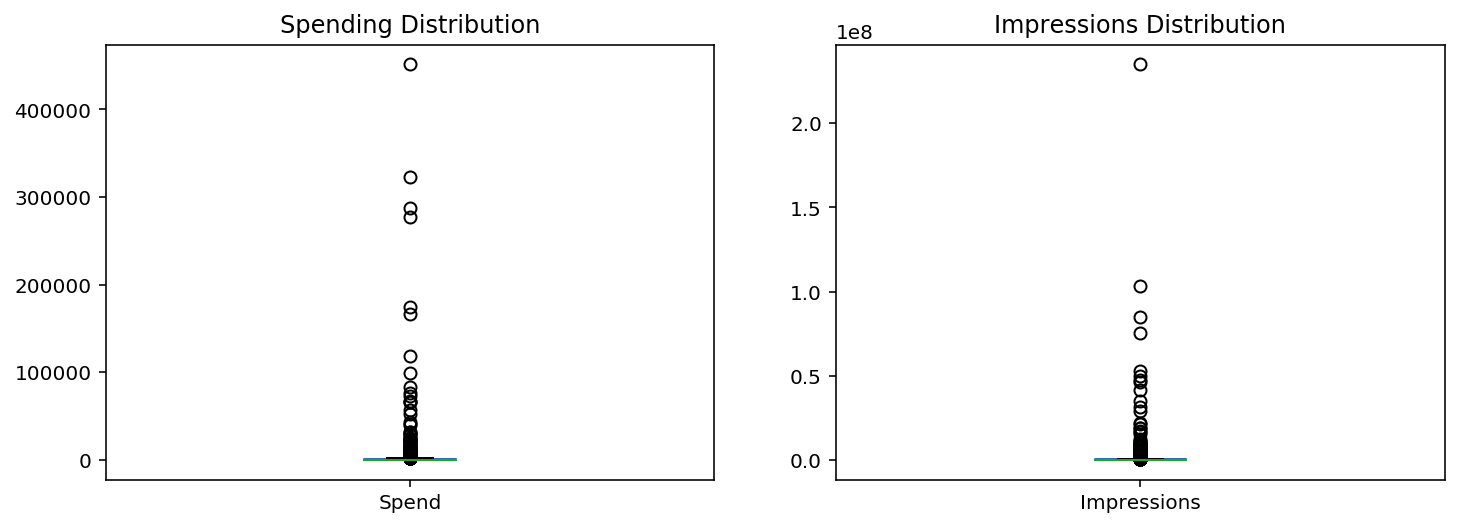

In [12]:
fig, axes = plt.subplots(1, 2, figsize=(12,4))
# plot spending
(
    ads_usd['Spend']
    .plot(
        kind = 'box', 
        ax = axes[0], 
        title = 'Spending Distribution'
    )
)
# plot impressions
(
    ads_usd['Impressions']
    .plot(
        kind = 'box', 
        ax = axes[1], 
        title = 'Impressions Distribution'
    )
)

### Finding most frequent organizations and candidates/ballots
* also to get an idea of what my data looks like

************ Most Common Organizations ************


UnRestrict Minnesota     311
Blueprint Interactive    248
ACRONYM                  182
Chong and Koster         163
Warren for President     150
Name: OrganizationName, dtype: int64

************ Most Common Candidate/Ballot ************


Warren for President    116
Get out the vote         92
Register to Vote         29
Holiday Travel           11
Teen Driver Safety        9
Name: CandidateBallotInformation, dtype: int64

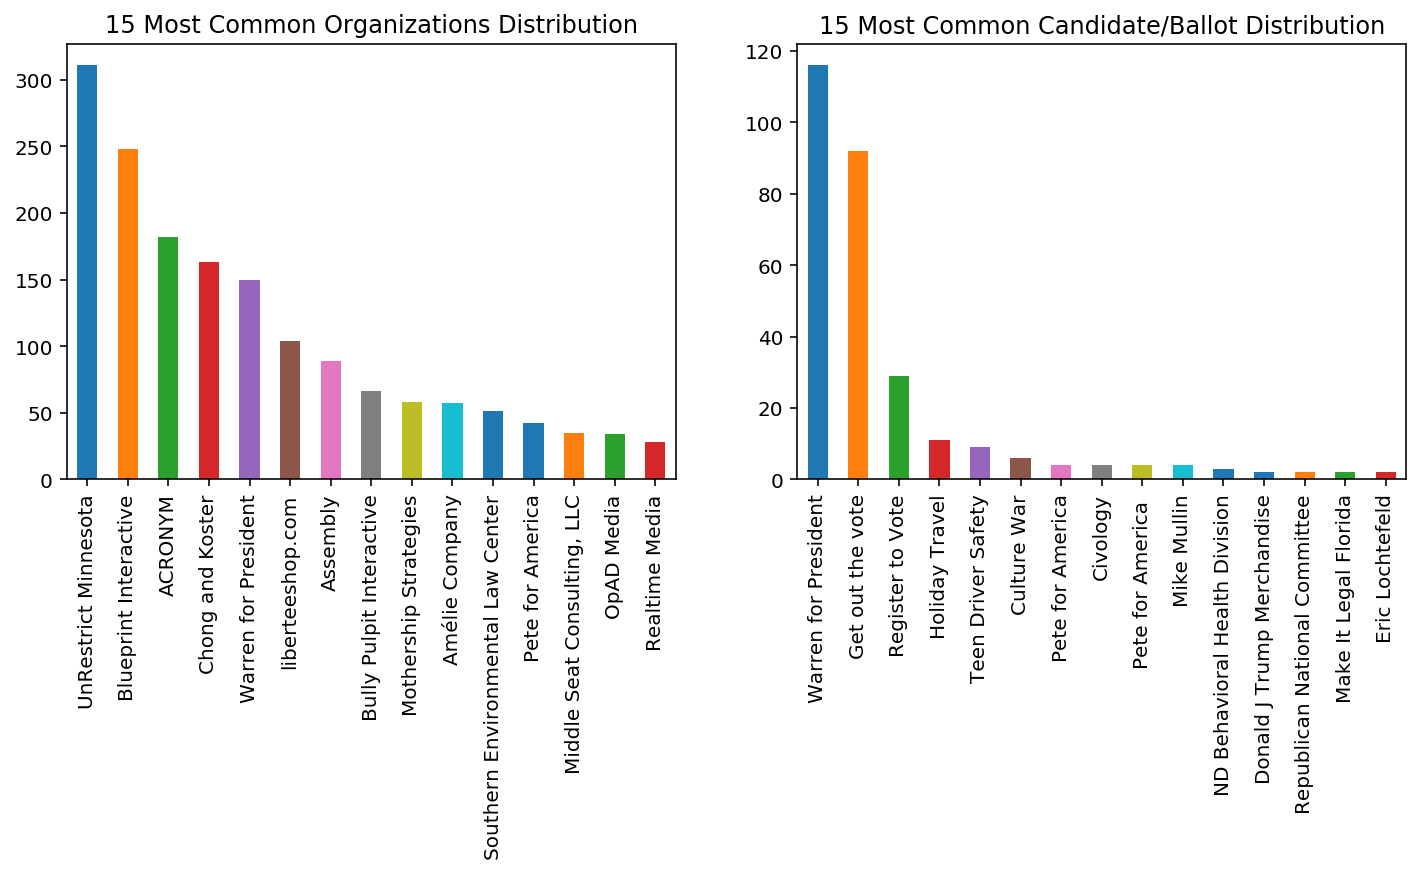

In [13]:
print('************ Most Common Organizations ************')
display(ads_usd['OrganizationName'].value_counts().head())
print('************ Most Common Candidate/Ballot ************')
display(ads_usd['CandidateBallotInformation'].value_counts().head())
fig, axes = plt.subplots(1, 2, figsize=(12,4))
# Plot the most common organizations & candidates/ballots in a bar graph
(
    ads_usd['OrganizationName'].value_counts()
    .head(15)
    .plot(
        kind = 'bar', 
        ax = axes[0], 
        title = '15 Most Common Organizations Distribution'
    )
)
(
    ads_usd['CandidateBallotInformation'].value_counts()
    .head(15)
    .plot(
        kind = 'bar', 
        ax = axes[1], 
        title = '15 Most Common Candidate/Ballot Distribution'
    )
)

### Most Expensive Ads
* keep columns of interest and find top 10

In [14]:
# find the top 10 most expensive ads
most = ads_usd.sort_values('Spend', ascending = False)
cols_of_interest = ['Spend', 'Impressions', 
                    'OrganizationName', 
                    'CandidateBallotInformation', 
                    'PayingAdvertiserName', 
                    'Gender', 
                    'Interests']
top_10 = most[cols_of_interest].head(10)
display(top_10)

Spend  Impressions OrganizationName CandidateBallotInformation  \
2417  451244    234901755    General Mills                        NaN   
731   322386     52836223    General Mills                        NaN   
2890  287043     47356384    General Mills                        NaN   
2113  277021     46334027    General Mills                        NaN   
190   174427    103438876    General Mills                        NaN   
2598  166500     17410136     Hawkfish LLC   Mike Bloomberg 2020 Inc    
1266  118706     50044571             R/GA                        NaN   
1415   99361     84687140  Mediavest Spark                        NaN   
3505   83500     41769342     Hawkfish LLC    Mike Bloomberg 2020 Inc   
257    76139      7967692    General Mills                        NaN   

              PayingAdvertiserName Gender  \
2417                 general mills    ALL   
731                  general mills    ALL   
2890                 general mills    ALL   
2113                 general mills    ALL   
190                  general mills    ALL   
2598     Mike Bloomberg 2020, Inc.    ALL   
1266            Planned Parenthood    ALL   
1415  Recreational Equipment, Inc.    ALL   
3505     Mike Bloomberg 2020, Inc.    ALL   
257                  general mills    ALL   

                                              Interests  
2417                                                NaN  
731                                                 NaN  
2890                                                NaN  
2113                                                NaN  
190                                                 NaN  
2598                                                NaN  
1266                                                NaN  
1415  Adventure Seekers,Hipsters & Trendsetters,Conc...  
3505                                                NaN  
257                                                 NaN

### Bivariate Analysis
* find relationship between impressions and spending via conditional distribution
* do the same for time elapsed (with respect to days)
* plot spending vs impressions and days vs impressions to see if there are any possible correlations

Proportion of Impressions By Given Quartile of Spending


Impressions
Spend_Quartiles               
(-0.001, 40.0]        0.002532
(40.0, 197.5]         0.017600
(197.5, 768.0]        0.076965
(768.0, 451244.0]     0.902903

Average Number of Impressions By Given Quartile of Spending


Impressions
Spend_Quartiles                
(-0.001, 40.0]     7.053560e+03
(40.0, 197.5]      4.986167e+04
(197.5, 768.0]     2.158045e+05
(768.0, 451244.0]  2.541183e+06

Proportion of Impressions By Given Quartile of Days Elapsed


Impressions
Days                      
(-0.001, 5.0]     0.101362
(5.0, 17.0]       0.217501
(17.0, 28.0]      0.186583
(28.0, 370.0]     0.494554

Average Number of Impressions By Given Quartile of Days Elapsed


Impressions
Days                       
(-0.001, 5.0]  2.952675e+05
(5.0, 17.0]    6.785230e+05
(17.0, 28.0]   6.129269e+05
(28.0, 370.0]  1.584528e+06

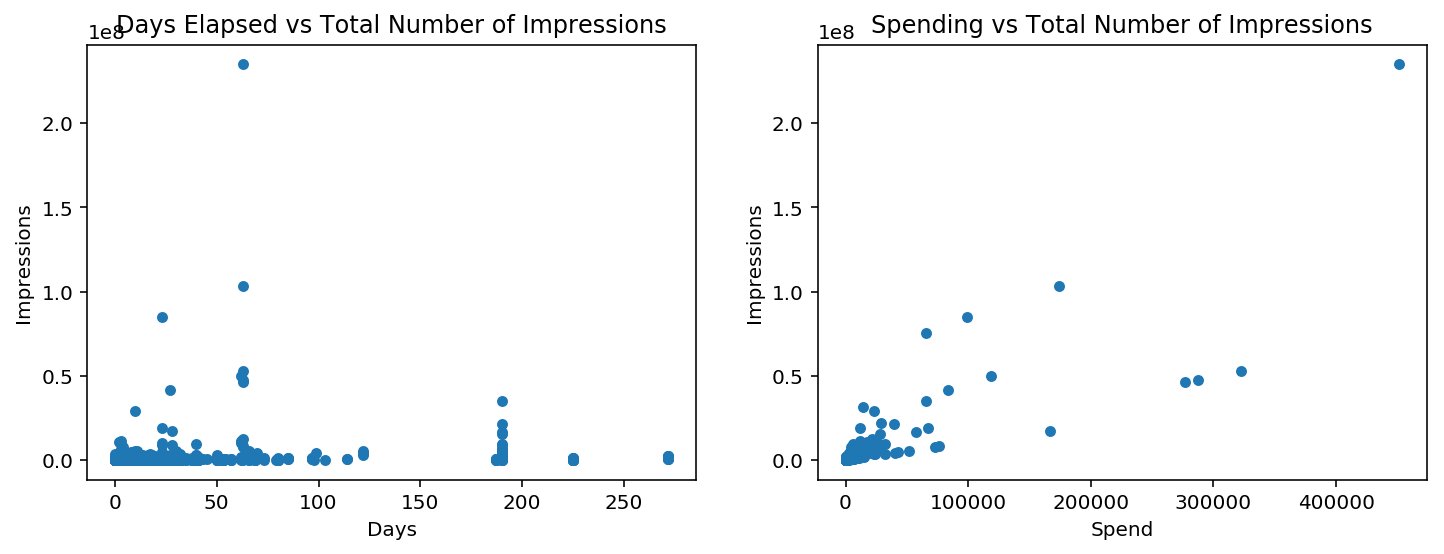

In [15]:
# find conditional distributions of total 
# impressions given spending quartile
print('Proportion of Impressions By Given Quartile of Spending')
display(
    ads_q.groupby('Spend_Quartiles')['Impressions']
    .aggregate('sum').to_frame()
    .apply(lambda x: x / x.sum())
)
# find average number of total 
# impressions given spending quartile
print('Average Number of Impressions By Given Quartile of Spending')
display(
    ads_q.groupby('Spend_Quartiles')['Impressions']
    .aggregate('mean').to_frame()
)
# find conditional distribution of total 
# impressions given days elapsed
print('Proportion of Impressions By Given Quartile of Days Elapsed')
display(
    ads_q.groupby('Days')['Impressions']
    .aggregate('sum').to_frame()
    .apply(lambda x: x / x.sum())
)
# find average number of total impressions 
# given days elapsed
print('Average Number of Impressions By Given Quartile of Days Elapsed')
display(
    ads_q.groupby('Days')['Impressions']
    .aggregate('mean').to_frame()
)
# set subplots
fig, axes = plt.subplots(1, 2, figsize=(12,4))
# plot days elapsed vs impressions 
(
    ads_usd.assign(
        Days = ads_usd['Time Elapsed']
        .apply(lambda x: x.days)
    ).plot(
        kind = 'scatter', 
        x = 'Days', 
        y = 'Impressions', 
        ax = axes[0], 
        title = 'Days Elapsed vs Total Number of Impressions'
    )
)
# plot spending vs impressions
ads_usd[['Spend','Impressions']].plot(
    kind = 'scatter', 
    x = 'Spend', 
    y = 'Impressions',
    ax = axes[1],
    title = 'Spending vs Total Number of Impressions'
)

### How successful were organizations?
* "success" measured by the number of impressions per dollar spent
* compare the organizations that contributed the most expensive ads to the most "successful"

In [16]:
# don't consider the ads that were not paid for
no_zeros = ads_usd[ads_usd['Spend'] > 0]
# add a column that contains the impression per dollar
ads_avg = (
    no_zeros.assign(
        **{'Impressions per dollar': no_zeros['Impressions']
           / no_zeros['Spend']
          }
    )
)
cols = ['OrganizationName','Impressions per dollar']
print("Most Successful Organizations")
# find top 10 organizations that had the most impressions per dollar
display(
    ads_avg.sort_values(
        'Impressions per dollar',
        ascending = False)[cols]
    .head(10)
)
print("Organizations that had the most expensive ads")
# find top 10 organizations with the most expensive ads
display(ads_avg.sort_values(
    'Spend', 
    ascending = False
)[cols].head(10))

Most Successful Organizations


OrganizationName  Impressions per dollar
3365            Southern Environmental Law Center             3231.959920
1091            Southern Environmental Law Center             3231.008000
1390            Southern Environmental Law Center             3230.088000
2704            Southern Environmental Law Center             2908.961303
3177            Southern Environmental Law Center             2907.647658
2229            Southern Environmental Law Center             2907.240326
3234                             liberteeshop.com             2860.000000
3247                             liberteeshop.com             2782.000000
797   Smile Internet Technologies Private Limited             2363.421182
2592                             liberteeshop.com             2289.333333

Organizations that had the most expensive ads


OrganizationName  Impressions per dollar
2417    General Mills              520.564827
731     General Mills              163.891183
2890    General Mills              164.980104
2113    General Mills              167.258175
190     General Mills              593.021012
2598     Hawkfish LLC              104.565381
1266             R/GA              421.584174
1415  Mediavest Spark              852.317710
3505     Hawkfish LLC              500.231641
257     General Mills              104.646659

### Interesting Aggregates
* Using pivot tables to see if longer duration + more spending = more impressions
* We see that the bottom right corner does contribute the most impressions
* However, spending seems to have more of an impact than duration

In [18]:
print("Average Number of Impressions by Days Elapsed and Spending")
agg = (
    ads_q.pivot_table(
        values = 'Impressions', 
        index = 'Spend_Quartiles', 
        columns = 'Days', 
        aggfunc = 'mean'
    )
)
display(agg)

Average Number of Impressions by Days Elapsed and Spending


Days               (-0.001, 5.0]   (5.0, 17.0]  (17.0, 28.0]  (28.0, 370.0]
Spend_Quartiles                                                            
(-0.001, 40.0]      7.149309e+03  5.637040e+03  4.328431e+03   1.016028e+04
(40.0, 197.5]       4.860538e+04  5.496061e+04  3.851945e+04   6.512854e+04
(197.5, 768.0]      1.913805e+05  2.603405e+05  2.146265e+05   2.386320e+05
(768.0, 451244.0]   1.678804e+06  2.067167e+06  1.672965e+06   3.734822e+06

### Aggregating Candidates
* I want to see how the most common candidates compared to the most successful

In [19]:
# group by candidate/ballot and aggregate mean 
# impressions per dollar and count of candidates/ballots
candidates = (
    ads_avg.groupby('CandidateBallotInformation')
    .aggregate({
        'Impressions per dollar': 'mean', 
        'CandidateBallotInformation': 'count'
    })
    .rename({
        'CandidateBallotInformation': 'Count'
    }, axis = 'columns')
)
# most "successful" candidates
print("10 Most 'Successful' Candidates/Ballots")
display(
    candidates.sort_values('Impressions per dollar', ascending = False)
    .head(10)
)
# most common candidates
print('10 Most Common Candidates/Ballots')
display(candidates.sort_values('Count', ascending = False).head(10))

10 Most 'Successful' Candidates/Ballots


Impressions per dollar  Count
CandidateBallotInformation                                             
Make It Legal Florida                                 891.606644      2
Ryan Gatti for State Senator District 36              813.000000      1
ND Behavioral Health Division                         618.901354      3
Teen Driver Safety                                    596.360615      9
Holiday Travel                                        579.209580     11
Mike Bloomberg 2020 Inc                               500.231641      1
Clean Energy Jobs Act                                 467.178777      1
Madeline Singas for Nassau County DA                  444.721805      1
Flowers for Sheriff                                   343.764151      1
Bella Womens Center                                   335.852341      1

10 Most Common Candidates/Ballots


Impressions per dollar  Count
CandidateBallotInformation                                  
Warren for President                        95.426321    111
Get out the vote                           172.238038     92
Register to Vote                           152.363260     29
Holiday Travel                             579.209580     11
Teen Driver Safety                         596.360615      9
Culture War                                247.681757      6
Pete for America                           146.087801      4
Pete for America                           300.284303      4
Civology                                   296.339344      4
ND Behavioral Health Division              618.901354      3

### Assessment of Missingness
* first we see the proportion of missingness for each column (that isn't MD)

In [20]:
# Find proportion of missingness for each column
missingness = ads.apply(lambda x: x.isnull().mean())
# Drop columns that are MD
rows = ['Gender', 'AgeBracket', 'Interests', 'OsType', 'Language', 
        'AdvancedDemographics', 'Targeting Connection Type', 
        'Targeting Carrier (ISP)', 'Time Elapsed']
missingness.drop(rows, axis = 0, inplace = True)
display(missingness)

ADID                              0.000000
CreativeUrl                       0.000000
Currency Code                     0.000000
Spend                             0.000000
Impressions                       0.000000
StartDate                         0.000000
EndDate                           0.182052
OrganizationName                  0.000000
BillingAddress                    0.000000
CandidateBallotInformation        0.866448
PayingAdvertiserName              0.000000
CountryCode                       0.000000
Regions (Included)                0.724227
Regions (Excluded)                0.989456
Electoral Districts (Included)    0.984770
Electoral Districts (Excluded)    1.000000
Radius Targeting (Included)       0.928304
Radius Targeting (Excluded)       0.997188
Metros (Included)                 0.958763
Metros (Excluded)                 0.996017
Postal Codes (Included)           0.802484
Postal Codes (Excluded)           0.972587
Location Categories (Included)    0.996251
Location Ca

### Investigating missingness of Segments on Interests column
* Is missingness of Segments dependent on the Interests column (whether or not an ad had specific interests targeted)?
* impute null values with "No Interests"
* replace non-null values with "Targeted Interests" to make things simple
* find observed value using TVD as my test statistic

In [21]:
# append missingness column to ads and copy it
missing_df = ads.assign(missing = ads['Segments'].isnull())
temp = missing_df.copy()
# impute nulls and apply function to replace non nulls
temp['Interests'].fillna('No Interests', inplace = True)
temp['Interests'] = (
    temp['Interests']
    .apply(lambda x: x if x == 'No Interests' else 'Targeted Interests')
)
# pivot table to find conditional distributions
distr = (
    temp.pivot_table(
        index = 'missing', 
        columns = 'Interests', 
        aggfunc = 'size'
    )
    .apply(lambda x: x / x.sum(), axis = 1)
)
display(distr)
# find TVD
obs_value = distr.diff().iloc[-1].abs().sum()
print("Observed TVD: " + str(obs_value))

Interests  No Interests  Targeted Interests
missing                                    
False          0.708458            0.291542
True           0.828412            0.171588

Observed TVD: 0.23990820041849817


### Permutation Test #1
* shuffle Interests column and append to a new shuffled data frame
* pivot and calculate TVD
* iterate 10,000 times
* calculate p-value and plot null distribution
* Null: the missingness in Segments is not dependent on whether there were specific Interests targeted
* Alternative: the missingness in Segments is dependent on whether there were specific Interests targeted

In [22]:
null_vals = []
for i in range(10000):
    # shuffled interests
    shuffled_col = (
        temp['Interests']
        .sample(replace = False, frac = 1)
        .reset_index(drop = True)
    )
    # append to new data frame
    shuffled = temp.assign(shuffled = shuffled_col)
    # calculate TVD
    null_val = (
        shuffled.pivot_table(
            index = 'missing', 
            columns = 'shuffled', 
            aggfunc = 'size'
        )
        .apply(lambda x: x / x.sum(), axis = 1)
        .diff().iloc[-1].abs().sum()
    )
    # append to nulls
    null_vals.append(null_val)

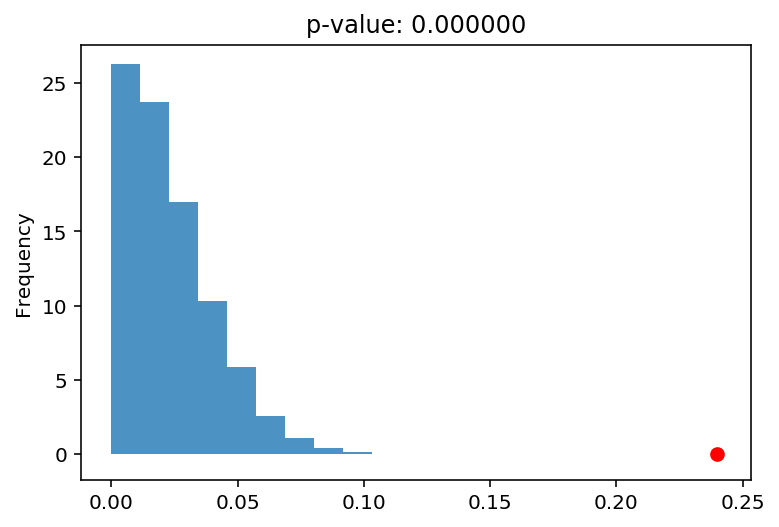

In [23]:
# calculate p-value
pval = (np.array(null_vals) >= obs_value).sum() / 10000
# plot histogram with p-value
pd.Series(null_vals).plot(
    kind='hist', 
    density=True, 
    alpha=0.8, 
    title='p-value: %f' % pval
)
plt.scatter(obs_value, 0, color='red', s=40);

### Investigating Segments vs Spend
* get dataframe with missing segments data
* get dataframe with non-missing segments data
* compute ks statistic
* Null: the missingness in Segments is not dependent on the values of Spend
* Alternative: the missingness in Segments is dependent on the values of Spend

In [26]:
# get missing and non-missing data
is_missing = missing_df['missing'] == True
not_missing = missing_df['missing'] == False
# get each respective spend column
spend_missing = missing_df[is_missing]['Spend']
spend_not = missing_df[not_missing]['Spend']
# compute observed ks statistic
obs_val = ks_2samp(spend_missing, spend_not).statistic
print('Observed KS: ' + str(obs_val))

Observed KS: 0.04723469643006037


### Permutation Test #2
* shuffle Spend column and append to new data frame
* calculate KS statistic and store in a list
* compute and plot p-value with null distribution

In [27]:
nulls = []
for i in range(10000):
    # shuffle spend
    shuffled_col = (
        missing_df['Spend']
        .sample(replace = False, frac = 1)
        .reset_index(drop = True)
    )
    # append spend column to new data frame
    shuffled = missing_df.assign(shuffled = shuffled_col)
    # get spend data from data frame with 
    # missing segments vs non-missing segments
    is_missing = shuffled['missing'] == True
    not_missing = shuffled['missing'] == False
    spend_missing = shuffled[is_missing]['shuffled']
    spend_not = shuffled[not_missing]['shuffled']
    # calculate KS statistic
    null = ks_2samp(spend_missing, spend_not).statistic
    nulls.append(null)

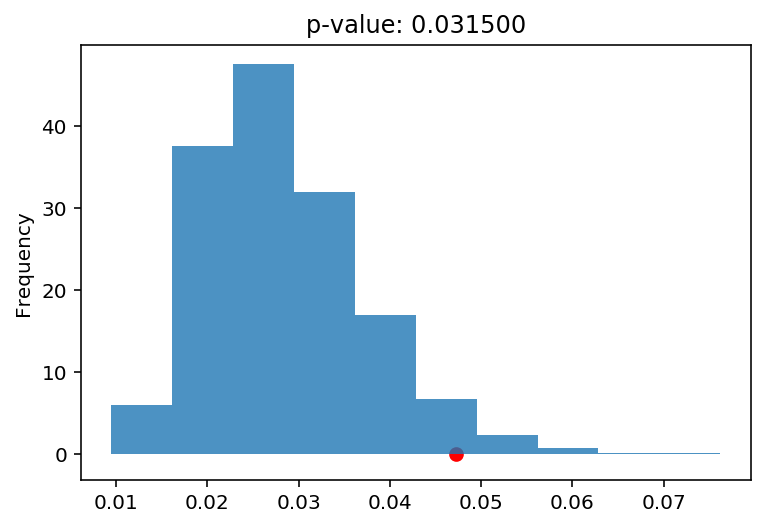

In [28]:
# Calculate p-value
pval = (np.array(nulls) >= obs_val).sum() / 10000
# Plot null distribution of test statistic
pd.Series(nulls).plot(
    kind='hist', 
    density=True, 
    alpha=0.8, 
    title='p-value: %f' % pval
)
plt.scatter(obs_val, 0, color='red', s=40);

### Hypothesis Test
* I wanted to see if spending has any impact on the number of impressions
* Question: Do ads that spend above the 50th percentile tend to have higher impressions?
* Null Hypothesis: Being above the 50th percentile in spending has no effect on impressions
* Alternative Hypothesis: Being above the 50th percentile in spending leads to a higher number of impressions
* Test: Conduct a permutation test using difference of means as the test statistic and significance level of 0.01

In [29]:
# find ads that spend over 50th percentile
over_50 = ads_usd['Spend'] > 158.5
# add column to ads_usd
over_df = ads_usd.assign(**{'Over 50': over_50})
# find observed difference of means
obs_val = (
    over_df.groupby('Over 50')['Impressions']
    .aggregate('mean')
    .diff()
    .iloc[-1]
)
obs_val

1401669.5047393364

In [30]:
nulls = []
for _ in range(10000):
    # shuffled impressions
    shuffled_col = (
        over_df['Impressions']
        .sample(replace = False, frac = 1)
        .reset_index(drop = True)
    )
    # add shuffled column to data frame
    shuffled = over_df.assign(shuffled = shuffled_col)
    # append null difference of means to list
    nulls.append(
        shuffled.groupby('Over 50')['shuffled']
        .aggregate('mean')
        .diff()
        .iloc[-1]
    )

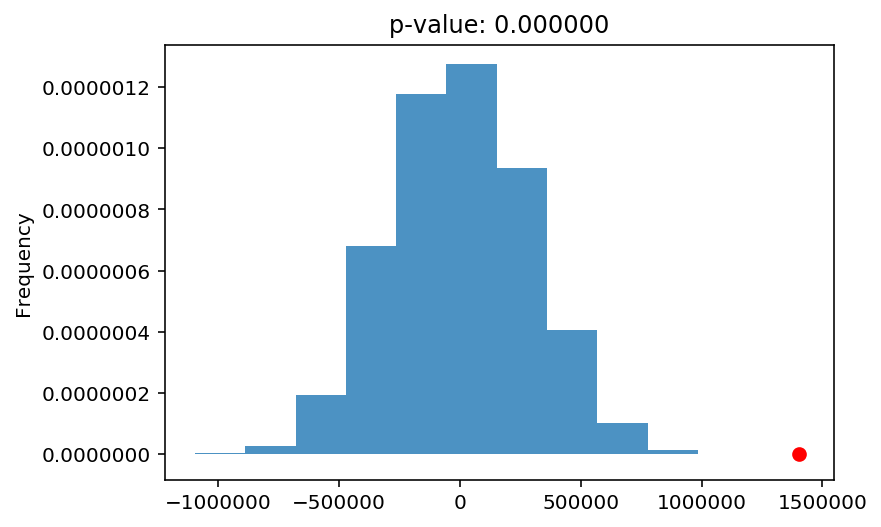

In [31]:
# plot p-value and distribution of 
# test statistics given the null hypothesis
p_value = (np.array(nulls) >= obs_val).sum() / 10000
pd.Series(nulls).plot(
    kind='hist', 
    density=True, 
    alpha=0.8, 
    title='p-value: %f' % p_value
)
plt.scatter(obs_val, 0, color='red', s=40);

## Code (Part 2)
### Cleaning the data beyond analysis section
1. Clean MD columns (the Nones)
2. Convert Time Elapsed into days

In [40]:
# Clean the rest of the MD columns by filling Nans with "NONE"
md_cols = ['Interests', 'Language', 
           'AdvancedDemographics', 'Targeting Connection Type']
for i in md_cols:
    ads[i].fillna('NONE', inplace = True)
# Convert Time Elapsed to Days
ads['Time Elapsed'] = ads['Time Elapsed'].apply(lambda x: x.days)
ads.head()

ADID  \
0  70fad9fa2aec8c0efbcc8b5eeab7548f1ecc7f4da501af...   
1  b001678c7a17cd5ae24629b8a0706b461bd12c9f3c0f36...   
2  f5c78277c3ffa75628cff48f56dc38e62e9595e0b338b3...   
3  088850498a7a0974ce72f745608de05034436b815377bf...   
4  96ec57079a71ebbee642d961b93e7b5af8e47a37560bcb...   

                                         CreativeUrl Currency Code  Spend  \
0  https://www.snap.com/political-ads/asset/2eca6...           USD     61   
1  https://www.snap.com/political-ads/asset/dcd53...           USD   1222   
2  https://www.snap.com/political-ads/asset/cc30e...           USD   5053   
3  https://www.snap.com/political-ads/asset/5515e...           USD   1016   
4  https://www.snap.com/political-ads/asset/7dbb6...           USD     90   

   Impressions           StartDate             EndDate  \
0        13396 2018-09-28 23:10:14 2018-10-10 01:00:00   
1       251477 2018-08-31 23:23:28 2018-10-01 06:59:59   
2      1637808 2018-10-29 17:40:22 2018-11-04 04:00:00   
3        98397 2018-10-18 18:01:21 2018-11-06 23:00:00   
4        18934 2018-10-24 14:32:39 2018-11-07 00:24:36   

               OrganizationName  \
0              Chong and Koster   
1  M&R Strategic Services, Inc.   
2                       ACRONYM   
3      Bully Pulpit Interactive   
4             Chakra Strategies   

                                      BillingAddress  \
0  1640 Rhode Island Ave. NW, Suite 600,Washingto...   
1                   1901 L St NW,Washington,20036,US   
2                                                 US   
3           1445 New York Ave NW,Washington,20005,US   
4        40101 Booth Kelly Road,Springfield,97478,US   

  CandidateBallotInformation     ...      Location Categories (Excluded)  \
0                        NaN     ...                                 NaN   
1                        NaN     ...                                 NaN   
2                        NaN     ...                                 NaN   
3                        NaN     ...                                 NaN   
4                        NaN     ...                                 NaN   

                                           Interests OsType  \
0                                               NONE    ALL   
1            Political News Watchers,ZZ_Deprecated_1    ALL   
2  Advocates & Activists,Basketball Fans,Bookworm...    ALL   
3                                               NONE    ALL   
4                                               NONE    ALL   

                 Segments Language     AdvancedDemographics  \
0  Provided by Advertiser     NONE  Marital Status (Single)   
1  Provided by Advertiser       en                     NONE   
2  Provided by Advertiser     NONE                     NONE   
3                     NaN     NONE                     NONE   
4                     NaN     NONE                     NONE   

  Targeting Connection Type  Targeting Carrier (ISP)  \
0                      NONE                      ALL   
1                      NONE                      ALL   
2                      NONE                      ALL   
3                      NONE                      ALL   
4                      NONE                      ALL   

                                  CreativeProperties Time Elapsed  
0  web_view_url:https://www.voterparticipation.or...         11.0  
1  web_view_url:https://www.unstoppablenow.org/?s...         30.0  
2           web_view_url:https://plan.showupto.vote/          5.0  
3                                                NaN         19.0  
4  web_view_url:http://www.yes106.org/?utm_source...         13.0  

[5 rows x 35 columns]

### Dropping Columns
* find missing rate for each column
* drop columns with vast majority missing (and isn't MD)
* drop columns that don't provide value or won't be needed for my model

In [41]:
ads.isnull().sum() / ads.shape[0]

ADID                              0.000000
CreativeUrl                       0.000000
Currency Code                     0.000000
Spend                             0.000000
Impressions                       0.000000
StartDate                         0.000000
EndDate                           0.182052
OrganizationName                  0.000000
BillingAddress                    0.000000
CandidateBallotInformation        0.866448
PayingAdvertiserName              0.000000
Gender                            0.000000
AgeBracket                        0.000000
CountryCode                       0.000000
Regions (Included)                0.724227
Regions (Excluded)                0.989456
Electoral Districts (Included)    0.984770
Electoral Districts (Excluded)    1.000000
Radius Targeting (Included)       0.928304
Radius Targeting (Excluded)       0.997188
Metros (Included)                 0.958763
Metros (Excluded)                 0.996017
Postal Codes (Included)           0.802484
Postal Code

In [42]:
ads_clean = (
    ads.drop('ADID', axis = 1)
    .drop('CreativeUrl', axis = 1)
    .drop('Regions (Included)', axis = 1)
    .drop('Regions (Excluded)', axis = 1)
    .drop('Electoral Districts (Included)', axis = 1)
    .drop('Electoral Districts (Excluded)', axis = 1)
    .drop('Radius Targeting (Included)', axis = 1)
    .drop('Radius Targeting (Excluded)', axis = 1)
    .drop('Metros (Included)', axis = 1)
    .drop('Metros (Excluded)', axis = 1)
    .drop('Postal Codes (Included)', axis = 1)
    .drop('Postal Codes (Excluded)', axis = 1)
    .drop('Location Categories (Included)', axis = 1)
    .drop('Location Categories (Excluded)', axis = 1)
    .drop('Segments', axis = 1)
    .drop('CreativeProperties', axis = 1)
    .drop('StartDate', axis = 1)
    .drop('EndDate', axis = 1)
    .drop('BillingAddress', axis = 1)
    .drop('AdvancedDemographics', axis = 1)
    .drop('Targeting Connection Type', axis = 1)
    .drop('Targeting Carrier (ISP)', axis = 1)
    .drop('OsType', axis = 1)
    .drop('Gender', axis = 1)
)
ads_clean.head()

Currency Code  Spend  Impressions              OrganizationName  \
0           USD     61        13396              Chong and Koster   
1           USD   1222       251477  M&R Strategic Services, Inc.   
2           USD   5053      1637808                       ACRONYM   
3           USD   1016        98397      Bully Pulpit Interactive   
4           USD     90        18934             Chakra Strategies   

  CandidateBallotInformation        PayingAdvertiserName AgeBracket  \
0                        NaN  Voter Participation Center        18+   
1                        NaN          Planned Parenthood        25+   
2                        NaN             Show Up To Vote        18+   
3                        NaN             NextGen America      18-34   
4                        NaN          Oregon Life United        18+   

     CountryCode                                          Interests Language  \
0  united states                                               NONE     NONE   
1  united states            Political News Watchers,ZZ_Deprecated_1       en   
2  united states  Advocates & Activists,Basketball Fans,Bookworm...     NONE   
3  united states                                               NONE     NONE   
4  united states                                               NONE     NONE   

   Time Elapsed  
0          11.0  
1          30.0  
2           5.0  
3          19.0  
4          13.0

### Oops, forgot to deal with remaining missing values
* Since missingness in time elapsed isn't dependent on other columns (but it is NMAR), I'll impute with mean
* I will impute CandidateBallotInformation with simply "None"

In [43]:
# Fill with None
(
    ads_clean['CandidateBallotInformation']
    .fillna('NONE', inplace = True)
)
# Fill with mean
(
    ads_clean['Time Elapsed']
    .fillna(ads['Time Elapsed'].mean(), inplace = True)
)
display(
    ads_clean[['CandidateBallotInformation', 'Time Elapsed']]
    .head()
)

CandidateBallotInformation  Time Elapsed
0                       NONE          11.0
1                       NONE          30.0
2                       NONE           5.0
3                       NONE          19.0
4                       NONE          13.0

### Remove Outliers
* remove observations with outlier spending or time elapsed
* define outliers as any values greater than mean + 2 * std or less than mean - 2 * std

In [44]:
# find mean/std for time elapsed
time_avg = ads_clean['Time Elapsed'].mean()
time_std = ads_clean['Time Elapsed'].std()
# find mean/std for spend
spend_avg = ads_clean['Spend'].mean()
spend_std = ads_clean['Spend'].std()
# find bounds for spend
upper_bound = spend_avg + spend_std * 2
lower_bound = spend_avg - spend_std * 2
# find bounds for time elapsed
upper_time = time_avg + time_std * 2
lower_time = time_avg - time_std * 2
# get conditions for spend
cond_1 = ads_clean['Spend'] > lower_bound
cond_2 = ads_clean['Spend'] < upper_bound
# bound spend
bounded_sp = ads_clean[cond_1 & cond_2]
# get conditions for time elapsed
time_1 = bounded_sp['Time Elapsed'] > lower_time
time_2 = bounded_sp['Time Elapsed'] < upper_time
# bound time elapsed and spend
bounded = bounded_sp[time_1 & time_2]
print("Shape before outliers removed:")
print(ads_clean.shape)
print("Shape after outliers removed:")
print(bounded.shape)

Shape before outliers removed:
(4268, 11)
Shape after outliers removed:
(4116, 11)


### Baseline Model
* now that I'm finally done cleaning, I can build my baseline model
* categoricals engineered with One-Hot Encoding
* Baseline: Linear Regression 
* Fit to training data and score
* Find RMSE and compare with mean impressions

In [120]:
# Drop/save target variable 'Impressions'
X = bounded.drop('Impressions', axis = 1)
y = bounded.Impressions
# create pipeline with quantitative columns
quants = ['Spend', 'Time Elapsed']
pl_quants = Pipeline(steps = [
    ('do-nothing', 
     FunctionTransformer(lambda x: x, validate = True)
    )
])
# create pipeline with categorical columns
cats = [y for y in list(X.columns) if y not in quants]
pl_cats = Pipeline(steps = [
    ('one-hot', OneHotEncoder(handle_unknown = 'ignore'))
])
# put it together with column transformer
pre_base = ColumnTransformer(transformers = [
    ('quants', pl_quants, quants),
    ('cats', pl_cats, cats)
])
# linear regression pipeline
lin_reg_pl = Pipeline(steps = [
    ('preprocessing', pre_base),
    ('lin-reg', LinearRegression())
])
# train, test, split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.26
)
lin_reg_pl.fit(X_train, y_train)
print("Score:")
print(lin_reg_pl.score(X_test, y_test))
print("RMSE:")
preds = lin_reg_pl.predict(X_test)
rmse = np.sqrt(np.mean((preds - y_test) ** 2))
print(rmse)
print("Mean Impressions:")
print(bounded['Impressions'].mean())

Score:
0.4522913125389809
RMSE:
981531.1686553705
Mean Impressions:
421827.71234207967


### Feature Engineering (Part 1)
* the baseline seems...decent...ok it's pretty bad, but I feel like there are improvements that can be done
* First, I want to "convert" all spending into a single currency
* Using the unique() function, I see that there are 5 different types of currency
* I will convert all currency to USD

In [46]:
# Unique values of Currency Code
print("Types of Currency")
print(bounded['Currency Code'].unique())
# conversion rates to USD
rates = {'USD':1, 'CAD':0.74, 'EUR': 1.12, 'GBP': 1.26, 'AUD': 0.69}
def rate_change(df):
    # obtain series with perspective rates
    rate = df['Currency Code'].apply(lambda x: rates.get(x))
    # multiply spending with conversion rates
    return (df['Spend'] * rate).to_frame()
currency = ['Currency Code', 'Spend']
# Function transformer pipeline
rate_pl = Pipeline(steps = [
    ('convert-currency', 
     FunctionTransformer(rate_change, validate = False)
    )
])
rate_pl.transform(bounded[['Currency Code','Spend']]).head()

Types of Currency
['USD' 'CAD' 'EUR' 'GBP' 'AUD']


0
0    61.0
1  1222.0
2  5053.0
3  1016.0
4    90.0

### Feature Engineering (Part 2)
* I want to "bin" AgeBracket column by ordinal encode
* Order will be as follows by lower bound: {<20: 1, 20s: 2, 30s: 3, 40+: 4, ALL: 5}
* Converting will be based on "lower bound" value

In [47]:
# Convert Age Bracket into "Bins"
def extract_age(group):
    if group == 'ALL':
        return 5
    # get lower bound of age bracket
    age = int(group[:2])
    if age < 20:
        return 1
    elif age < 30:
        return 2
    elif age < 40:
        return 3
    else:
        return 4
# Function for function transformer
def convert_age(df):
    return df['AgeBracket'].apply(extract_age).to_frame()
age = ['AgeBracket']
# Function transform with ordinal encode
age_pl = Pipeline(steps = [
    ('convert-age', 
     FunctionTransformer(convert_age, validate = False)
    )
])
age_pl.fit(bounded[['AgeBracket']])
pd.DataFrame(age_pl.transform(bounded[['AgeBracket']])).head()

AgeBracket
0           1
1           2
2           1
3           1
4           1

### Feature Engineering (Part 3.1)
* Now I will feature engineer the remaining categorical columns
* Columns like organization name and candidates have a lot of variety
* For those columns, "keep" top 10 most common values, convert the rest to "Other"

In [48]:
# Convert non-top 10 orgs to "other"
def orgs_convert(df):
    top_10 = (
        df['OrganizationName']
        .value_counts(normalize = True)[:10]
        .index.values
    )
    out = (
        df['OrganizationName']
        .apply(lambda x: 'Other' if x not in top_10 else x)
    )
    return out.to_frame()
# make pipeline with function and ohe
org_name = ['OrganizationName']
orgs_ohe = Pipeline(steps = [
    ('not-top-10', 
     FunctionTransformer(orgs_convert, validate = False)
    ),
    ('one-hot', 
     OneHotEncoder(handle_unknown = 'ignore', sparse = False)
    )
])
# fit and transform
orgs_ohe.fit(bounded[['OrganizationName']])
print("Engineered Organization Name")
display(pd.DataFrame(orgs_ohe.transform(bounded)).head())
# Convert non-top 10 candidates to "other"
def cand_convert(df):
    top_10 = (
        df['CandidateBallotInformation']
        .value_counts(normalize = True)[:10]
        .index.values
    )
    out = (
        df['CandidateBallotInformation']
        .apply(lambda x: 'Other' if x not in top_10 else x)
    )
    return out.to_frame()
# make pipeline with function and ohe
cand_name = ['CandidateBallotInformation']
cand_ohe = Pipeline(steps = [
    ('not-top-10', 
     FunctionTransformer(cand_convert, validate = False)
    ),
    ('one-hot', 
     OneHotEncoder(handle_unknown = 'ignore', sparse = False)
    )
])
# fit and transform
cand_ohe.fit(bounded[['CandidateBallotInformation']])
print("Engineered Candidate Ballot Information")
display(pd.DataFrame(cand_ohe.transform(bounded)).head())
# Convert non-top 10 paying advertisers to "other"
def ad_convert(df):
    top_10 = (
        df['PayingAdvertiserName']
        .value_counts(normalize = True)[:10]
        .index.values
    )
    out = (
        df['PayingAdvertiserName']
        .apply(lambda x: 'Other' if x not in top_10 else x)
    )
    return out.to_frame()
# make pipeline with function and ohe
ad_name = ['PayingAdvertiserName']
ad_ohe = Pipeline(steps = [
    ('not-top-10', 
     FunctionTransformer(ad_convert, validate = False)
    ),
    ('one-hot', 
     OneHotEncoder(handle_unknown = 'ignore', sparse = False)
    )
])
# fit and transform
ad_ohe.fit(bounded[['PayingAdvertiserName']])
print("Engineered Paying Advertiser Name")
display(pd.DataFrame(ad_ohe.transform(bounded)).head())

Engineered Organization Name


0    1    2    3    4    5    6    7    8    9    10
0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
1  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0
2  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
3  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
4  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0

Engineered Candidate Ballot Information


0    1    2    3    4    5    6    7    8    9    10
0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0
1  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0
2  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0
3  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0
4  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0

Engineered Paying Advertiser Name


0    1    2    3    4    5    6    7    8    9    10
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0
1  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
2  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
3  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
4  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0

### Feature Engineering (Part 3.1)
* For Interests, I would like to convert to binary values: Either it has interests (1) or doesn't (0)
* For Language and Country Code, I will do the same feature engineering in 3.1
* Finally, I will leave Time Elapsed alone

In [49]:
# Convert non-top 10 Languages to "other"
def lang_convert(df):
    top_10 = (
        df['Language']
        .value_counts(normalize = True)[:10]
        .index.values
    )
    out = (
        df['Language']
        .apply(lambda x: 'Other' if x not in top_10 else x)
    )
    return out.to_frame()
# make pipeline with function and ohe
lang = ['Language']
lang_ohe = Pipeline(steps = [
    ('not-top-10', 
     FunctionTransformer(lang_convert, validate = False)
    ),
    ('one-hot', 
     OneHotEncoder(handle_unknown = 'ignore', sparse = False)
    )
])
# fit and transform
lang_ohe.fit(bounded[['Language']])
print("Engineered Language")
display(pd.DataFrame(lang_ohe.transform(bounded)).head())
# Convert non-top 10 Country Codes to "other"
def cc_convert(df):
    top_10 = (
        df['CountryCode']
        .value_counts(normalize = True)[:10]
        .index.values
    )
    out = (
        df['CountryCode']
        .apply(lambda x: 'Other' if x not in top_10 else x)
    )
    return out.to_frame()
# make pipeline with function and ohe
cc_name = ['CountryCode']
cc_ohe = Pipeline(steps = [
    ('not-top-10', 
     FunctionTransformer(cc_convert, validate = False)
    ),
    ('one-hot', 
     OneHotEncoder(handle_unknown = 'ignore', sparse = False)
    )
])
# fit and transform
cc_ohe.fit(bounded[['CountryCode']])
print("Engineered Country Code")
display(pd.DataFrame(cc_ohe.transform(bounded)).head())

Engineered Language


0    1    2    3    4    5    6    7    8    9    10
0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
1  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0
2  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
3  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
4  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0

Engineered Country Code


0    1    2    3    4    5    6    7    8    9    10
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0
3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0

In [50]:
# Function to binarize interests
def binarize(df):
    out = (
        df['Interests']
        .apply(lambda x: 0 if x == 'NONE' else 1)
        .to_frame()
    )
    return out
# Create pipeline for interests 
interests = ['Interests']
int_pl = Pipeline(steps = [
    ('binarize', FunctionTransformer(binarize, validate = False))
])
print("Engineered Interests")
display(int_pl.transform(bounded).head())
# Create pipeline for time elapsed
time_el = ['Time Elapsed']
time_pl = Pipeline(steps = [
    ('do-nothing', FunctionTransformer(lambda x: x, validate = True))
])
print("\"Engineered\" Time Elapsed")
pd.DataFrame(time_pl.transform(bounded[['Time Elapsed']])).head()

Engineered Interests


Interests
0          0
1          1
2          1
3          0
4          0

"Engineered" Time Elapsed


0
0  11.0
1  30.0
2   5.0
3  19.0
4  13.0

### Column Transformer
* Finally, I will put it all together in a column transformer

In [51]:
# Create Column Transformer
preproc = ColumnTransformer(transformers = [
    ('currency-convert', rate_pl, currency),
    ('age', age_pl, age),
    ('org-ohe', orgs_ohe, org_name),
    ('cand-ohe', cand_ohe, cand_name),
    ('ad-ohe', ad_ohe, ad_name),
    ('lang-ohe', lang_ohe, lang),
    ('cc-ohe', cc_ohe, cc_name),
    ('interests', int_pl, interests),
    ('do-nothing', time_pl, time_el)
])
preproc.fit(X_train)
display(
    pd.DataFrame(preproc.transform(X_train)).head()
)

0    1    2    3    4    5    6    7    8    9   ...    49   50   51  \
0   842.24  1.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  ...   0.0  0.0  0.0   
1     6.00  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0  0.0  0.0   
2  2761.92  1.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  ...   0.0  0.0  0.0   
3   117.00  1.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  ...   0.0  0.0  0.0   
4   753.76  1.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  ...   1.0  0.0  0.0   

    52   53   54   55   56   57    58  
0  0.0  0.0  0.0  0.0  0.0  0.0   7.0  
1  0.0  0.0  0.0  0.0  1.0  1.0  18.0  
2  0.0  0.0  0.0  1.0  0.0  1.0  31.0  
3  0.0  1.0  0.0  0.0  0.0  0.0   4.0  
4  0.0  0.0  0.0  0.0  0.0  0.0  13.0  

[5 rows x 59 columns]

### Improvement
* With feature engineering, we see a decrease in RMSE
* We also see an increase in R^2

In [121]:
# Linear regression pipeline
lin_reg_2 = Pipeline(steps = [
    ('preproc', preproc),
    ('lin-reg', LinearRegression())
])
# Fit with training data and score with test data
lin_reg_2.fit(X_train, y_train)
print("Score:")
print(lin_reg_2.score(X_test, y_test))
print("RMSE:")
preds = lin_reg_2.predict(X_test)
rmse = np.sqrt(np.mean((preds - y_test) ** 2))
print(rmse)
print("Mean Impressions:")
print(bounded['Impressions'].mean())

Score:
0.6932630507888697
RMSE:
734534.7174893841
Mean Impressions:
421827.71234207967


### Model Selection
For regression, I have selected the following models:
1. Linear Regression
2. Random Forest Regression
3. Lasso Regression
4. Ridge Regression
5. SVR
6. Decision Tree Regression
7. K Neighbors Regression

I will loop over each model, build a pipeline and print the average score of the cross validation

In [122]:
# initiate and append each model to a list
models = []
names = ['Linear Regression', 'Random Forest', 'Lasso',
         'Ridge', 'SVR', 'Decision Tree', 'KNN']
lr = LinearRegression()
models.append(lr)
rfr = RandomForestRegressor()
models.append(rfr)
lass = Lasso()
models.append(lass)
ridge = Ridge()
models.append(ridge)
svr = SVR()
models.append(svr)
dtr = DecisionTreeRegressor()
models.append(dtr)
knn = KNeighborsRegressor()
models.append(knn)
idx = 0
# ignore warnings because they're annoying
filterwarnings('ignore')

# loop through each model, build pipeline, and print metrics
for i in models:
    pl_temp = Pipeline(steps = [
        ('preproc', preproc),
        ('model', i),
    ])
    pl_temp.fit(X_train, y_train)
    print(names[idx])
    cv_score = cross_val_score(pl_temp, X_train, y_train, cv=5)
    avg_score = np.mean(cv_score)
    print('Score: ' + str(avg_score))
    idx += 1

Linear Regression
Score: 0.5574084731043116
Random Forest
Score: 0.4928647341028
Lasso
Score: 0.5574641237989126
Ridge
Score: 0.5593183067326694
SVR
Score: -0.06700573836980853
Decision Tree
Score: 0.41289922007305274
KNN
Score: 0.45685847976875893


### Parameter Selection
* From the model selection, it seems like ridge regression performs the best (barely)
* Using GridSearchCV, I will try to determine the best input for parameter alpha

In [123]:
# Parameters for alpha
parameters = {
    'alpha': [0.1, 0.15, 0.25, 0.5, 0.75, 1] + list(range(2,21,1))
}
# fit GridSearchCV
ctf_ridge = GridSearchCV(Ridge(), parameters, cv = 5)
ctf_ridge.fit(preproc.transform(X_train), y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': [0.1, 0.15, 0.25, 0.5, 0.75, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [124]:
print("Best Score")
print(ctf_ridge.best_score_)
print("Best Parameters")
print(ctf_ridge.best_params_)

Best Score
0.5718007763273053
Best Parameters
{'alpha': 12}


### Final Model
* After hypertuning parameters, I have my final model (Ridge Regression)
* Slightly better R^2 and RMSE than linear regression

In [126]:
# Pipeline with final model
final_mdl = Pipeline(steps = [
    ('preproc', preproc),
    ('ridge', Ridge(alpha = 12))
])
# Fit and score final model
final_mdl.fit(X_train, y_train)
print("Final Model Score:")
print(final_mdl.score(X_test, y_test))
print("Final Model RMSE:")
pred_final = final_mdl.predict(X_test)
print(np.sqrt(np.mean((pred_final - y_test) ** 2)))

Final Model Score:
0.6999788264107223
Final Model RMSE:
726449.1722456357


In [127]:
# Linear Regression results for comparison
lin_reg_mdl = Pipeline(steps = [
    ('preproc', preproc),
    ('lin-reg', LinearRegression())
])
lin_reg_mdl.fit(X_train, y_train)
print("Linear Regression Score:")
print(lin_reg_mdl.score(X_test, y_test))
print("Linear Regression RMSE:")
pred_lr = lin_reg_mdl.predict(X_test)
print(np.sqrt(np.mean((pred_lr - y_test) ** 2)))

Linear Regression Score:
0.6932630507888697
Linear Regression RMSE:
734534.7174893841


### Fairness Evaluation
* Is my model unfair towards ads that spend more on ads?
* Null: My model is fair; the RMSE of ads that spend above the median is roughly the same as the RMSE of ads that spend below or equal to the median
* Alternative: My model is unfair; the RMSE of ads that spend above the median is higher than the RMSE of ads that spend below or equal to the median
* I will test this with a permutation test and the difference in RMSE as a test statistic 

In [88]:
# Find median
spend_median = bounded['Spend'].median()
# Assign True to rows above median spending and False otherwise
spend_bool = bounded['Spend'] > spend_median
ads_w_bool = bounded.assign(**{'Above Spend Median':spend_bool}) 
# Find dataframe with rows above median spending
obs_true = ads_w_bool[ads_w_bool['Above Spend Median']]
# Find dataframe with rows below or equal to median spending
obs_false = ads_w_bool[~ads_w_bool['Above Spend Median']]
# Fit model to rows with above median spending
true_X = obs_true.drop('Impressions', axis = 1)
true_y = obs_true.Impressions
final_mdl.fit(true_X, true_y)
# Find rmse of rows with above median spending
true_pred = final_mdl.predict(true_X)
rmse_true = np.sqrt(np.mean((true_pred - true_y) ** 2))
print("RMSE of ads above median spending:")
print(rmse_true)
# Fit model to rows that are below or equal to median spending
false_X = obs_false.drop('Impressions', axis = 1)
false_y = obs_false.Impressions
final_mdl.fit(false_X, false_y)
# Find rmse of rows that are below or equal median spending
false_pred = final_mdl.predict(false_X)
rmse_false = np.sqrt(np.mean((false_pred - false_y) ** 2))
print("RMSE of ads below or equal to median spending:")
print(rmse_false)
print("Difference of RMSEs:")
obs_diff = rmse_true - rmse_false
print(obs_diff)

RMSE of ads above median spending:
1250837.2118185877
RMSE of ads below or equal to median spending:
29505.869777867894
Difference of RMSEs:
1221331.34204072


### Simulation Under Null Hypothesis
* shuffle column and append to data frame
* calculate difference in RMSE with new shuffled column
* simulate 1,000 times

In [89]:
nulls = []
for _ in range(1000):
    # shuffle column
    shuffled_col = (
        ads_w_bool['Above Spend Median']
        .sample(replace = False, frac = 1)
        .reset_index(drop = True)
    )
    # append column
    shuffled = (
        ads_w_bool.reset_index(drop = True)
        .assign(**{'shuffled':shuffled_col})
    )
    # Find dataframe with rows above median spending
    null_true = shuffled[shuffled['shuffled']]
    # Find dataframe with rows below or equal to median spending
    null_false = shuffled[~shuffled['shuffled']]
    # Fit model to rows with above median spending
    true_null_X = null_true.drop('Impressions', axis = 1)
    true_null_y = null_true.Impressions
    final_mdl.fit(true_null_X, true_null_y)
    # Find rmse of rows with above median spending
    true_null_pred = final_mdl.predict(true_null_X)
    rmse_true_null = np.sqrt(np.mean((true_null_pred - true_null_y) ** 2))
    # Fit model to rows that are below or equal to median spending
    false_null_X = null_false.drop('Impressions', axis = 1)
    false_null_y = null_false.Impressions
    final_mdl.fit(false_null_X, false_null_y)
    # Find rmse of rows that are below or equal median spending
    false_null_pred = final_mdl.predict(false_null_X)
    rmse_false_null = np.sqrt(np.mean((false_null_pred - false_null_y) ** 2))
    null_diff = rmse_true_null - rmse_false_null
    nulls.append(null_diff)

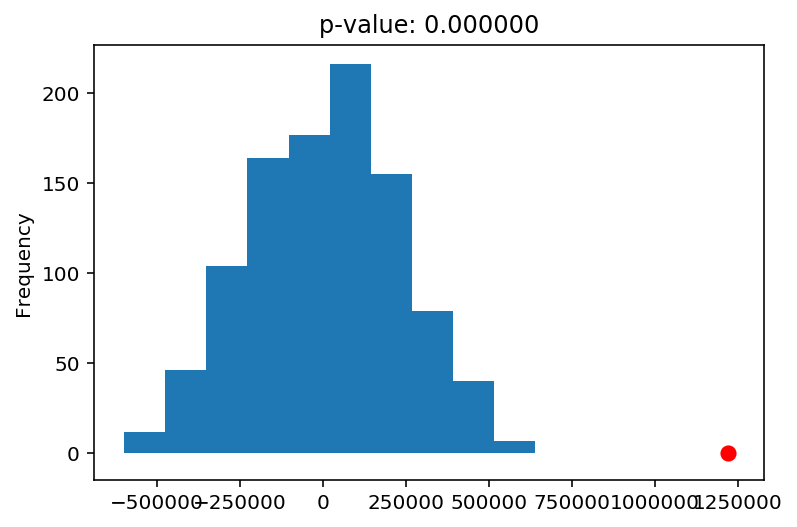

In [90]:
# Find p-value and plot histogram
null_series = pd.Series(nulls)
pval = (null_series >= obs_diff).sum() / 10000
null_series.plot(kind='hist', title='p-value: %f' % pval)
plt.scatter([obs_diff], [0], s=50, color='r')